In [1]:
#https://github.com/andrewgreenconvoy/betting-analysis-regarding-baseball
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import statsmodels.formula.api as smf

#https://github.com/jldbc/pybaseball/blob/master/docs/team_batting.md
from pybaseball import statcast
from pybaseball import standings
from pybaseball import schedule_and_record
import pybaseball

In [2]:
data = standings(2019)
table = np.array(data).reshape(30,5)
standings = pd.DataFrame(table)
standings.columns = ['Tm','W','L','WIN_PERC','GB']



In [3]:
hitting = pybaseball.team_batting(2018)
pitching = pybaseball.team_pitching(2018)
team_df  = hitting.merge(pitching
                         , left_on='Team'
                         ,right_on='Team'
                         ,suffixes=['_hitting','_pitching'])


In [4]:
team_df['pred_wins'] = 162 * ((team_df['R_hitting']**1.83) /
                              ((team_df['R_hitting']**1.83) + (team_df['R_pitching']**1.83)) )

MPE= 0.0039581256316865675
MAPE= 0.04637415501328379


Text(0, 0.5, 'PT Wins')

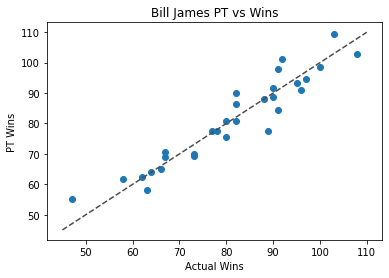

In [5]:
print('MPE=',np.mean((team_df['pred_wins'] - team_df['W']) / team_df['W']))
print('MAPE=',np.mean(abs(team_df['pred_wins'] - team_df['W']) / team_df['W']))

plt.figure()
plt.scatter(team_df['W'],team_df['pred_wins'])
plt.title('Bill James PT vs Wins')
plt.xlabel('Actual Wins')
plt.plot([45,110], [45,110], ls="--", c=".3")
plt.ylabel('PT Wins')

In [6]:
# Below link has definititons of MLB Advanced Metrics
# https://docs.google.com/document/d/1lwhnN7Mspalc8uRED6fmNGJCurcKP85mWomOG8eRaq0/edit

In [7]:
hitting.head()

,teamIDfg,Season,Team,Age,G,AB,PA,H,1B,2B,...,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events
0,3,2018,Red Sox,29,2345,5623,6302,1509,915,355,...,105,97,89.8,12.4,343,0.078,117.5,1758,0.397,4425
1,9,2018,Yankees,28,2269,5515,6271,1374,815,269,...,96,104,89.4,13.5,344,0.083,121.7,1590,0.382,4163
2,22,2018,Dodgers,29,2574,5572,6358,1394,830,296,...,95,108,89.2,14.5,330,0.078,115.3,1549,0.368,4214
3,5,2018,Indians,30,2413,5595,6300,1447,915,297,...,96,108,88.8,13.9,272,0.061,114.5,1626,0.363,4477
4,10,2018,Athletics,29,2403,5579,6255,1407,838,322,...,95,112,89.5,15.0,333,0.078,115.3,1663,0.391,4248


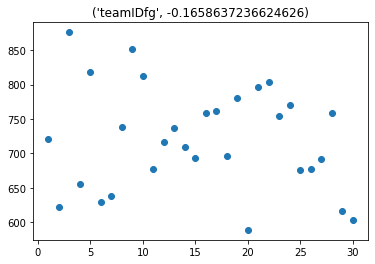

/opt/miniconda3/envs/env/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


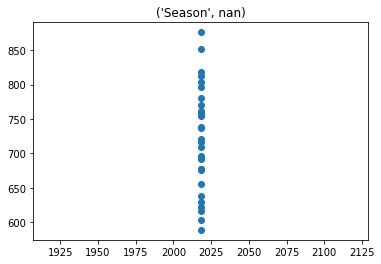

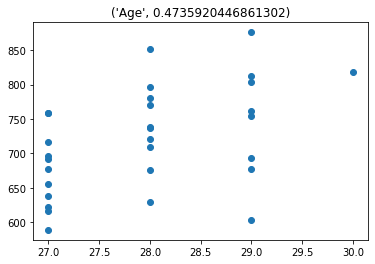

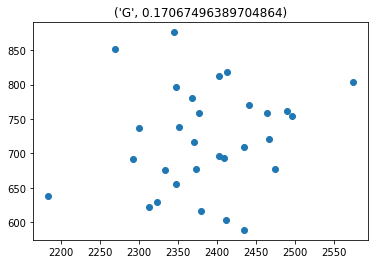

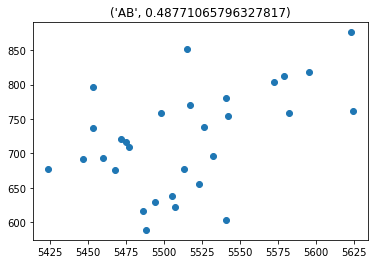

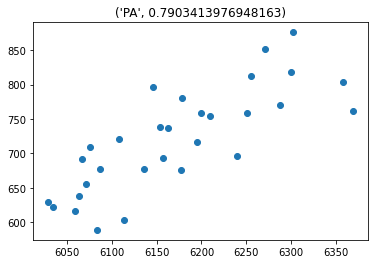

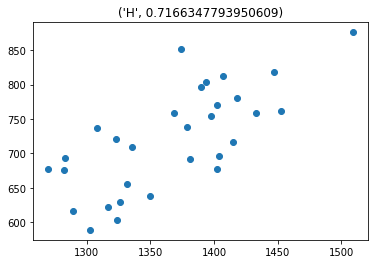

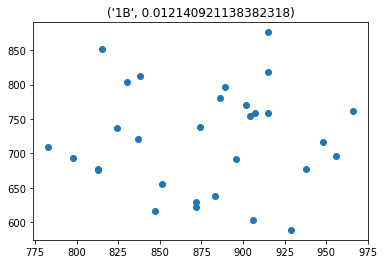

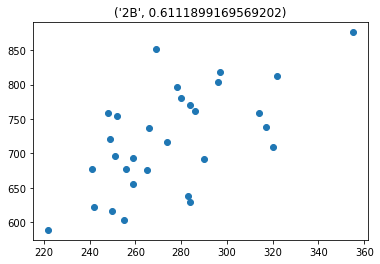

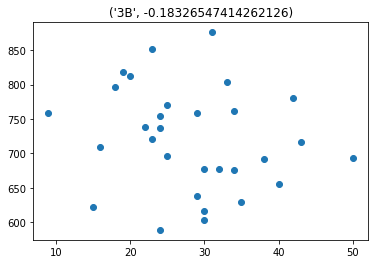

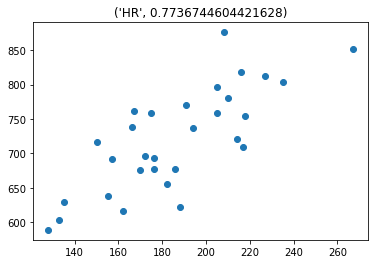

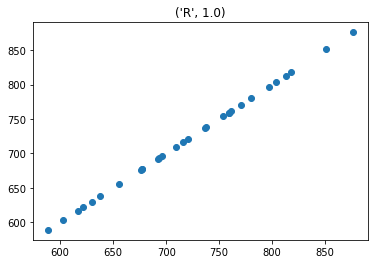

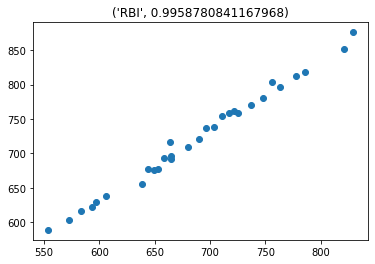

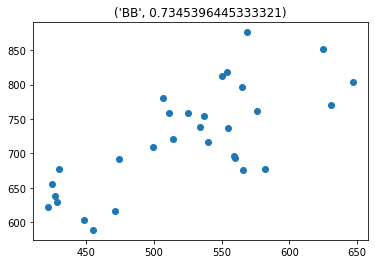

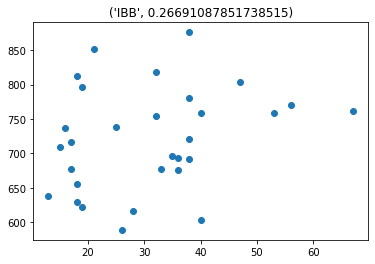

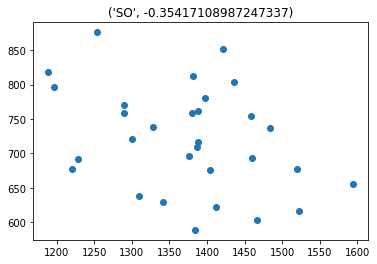

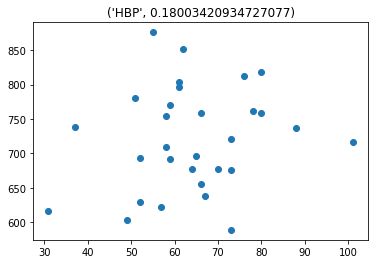

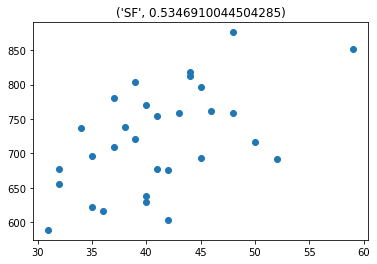

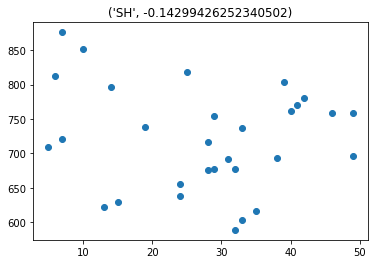

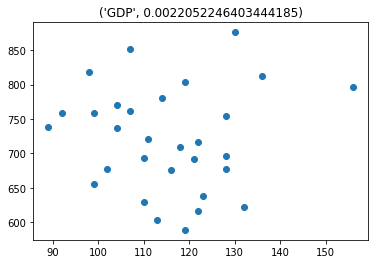

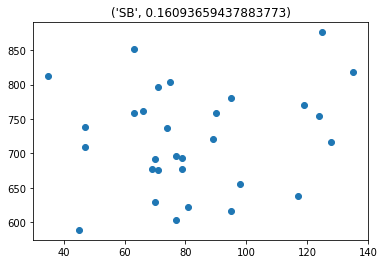

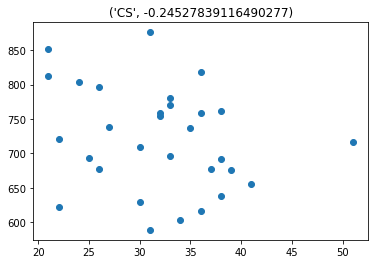

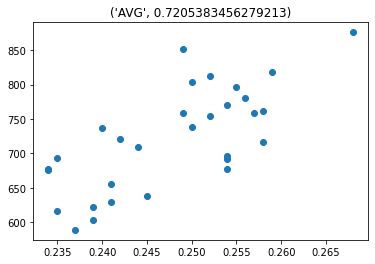

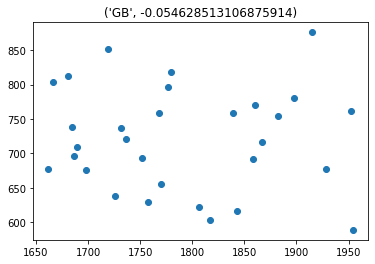

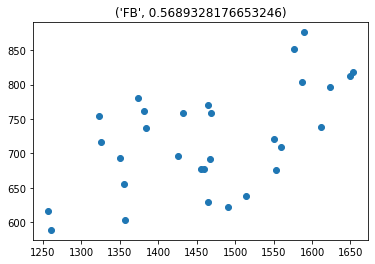

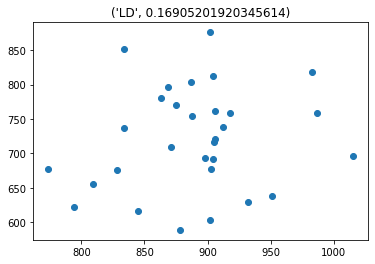

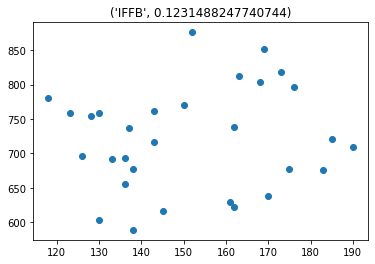

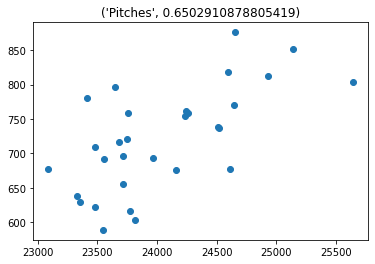

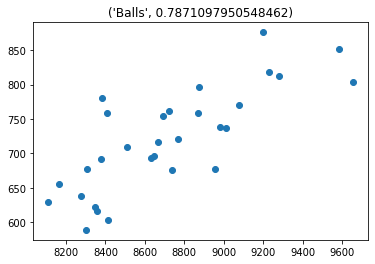

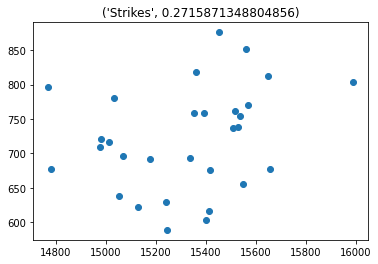

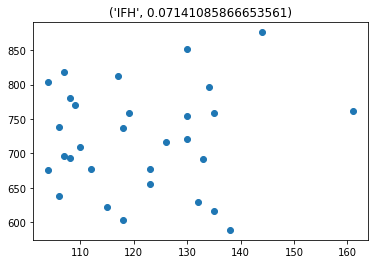

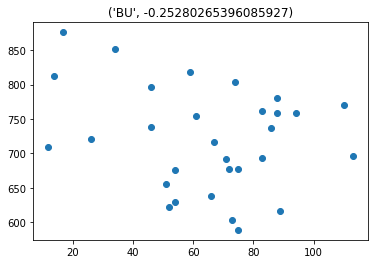

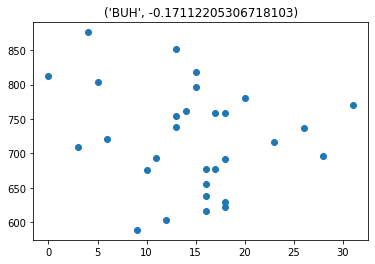

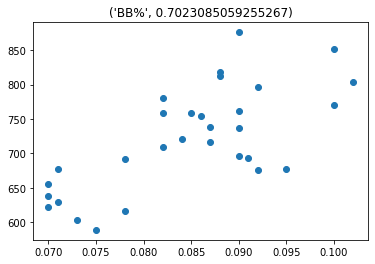

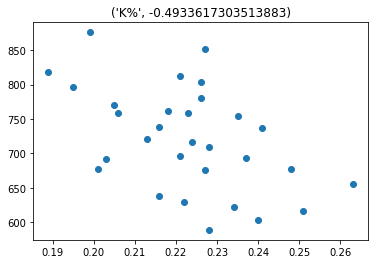

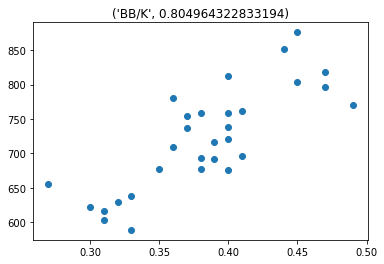

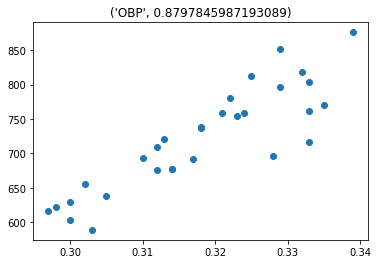

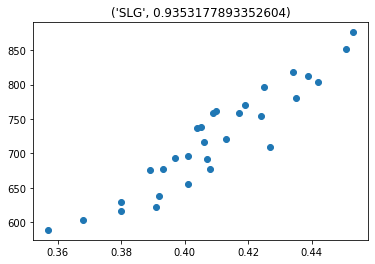

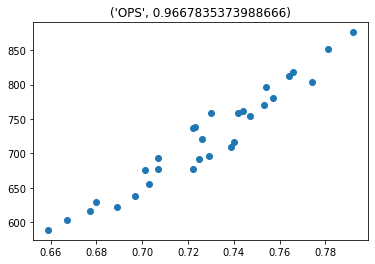

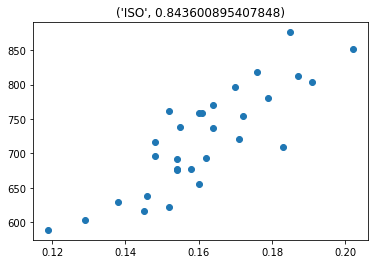

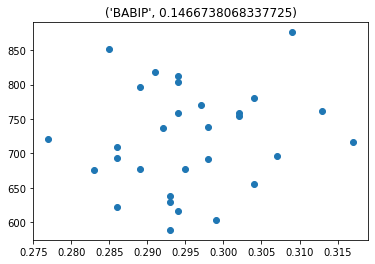

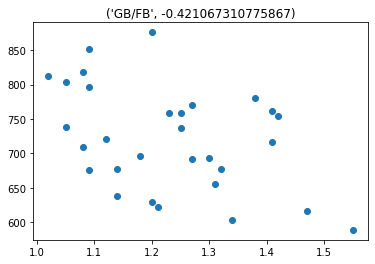

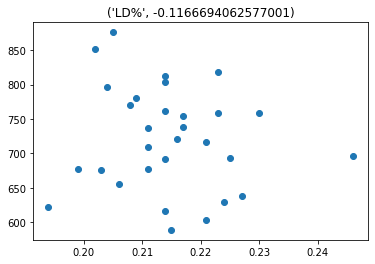

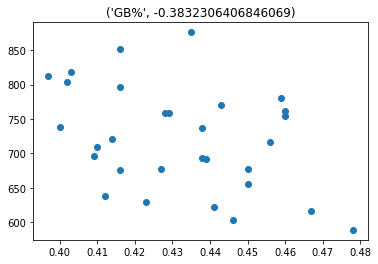

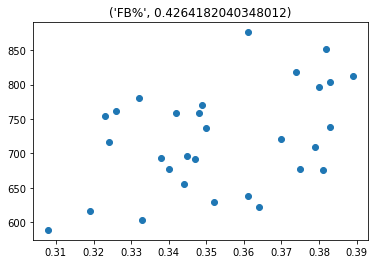

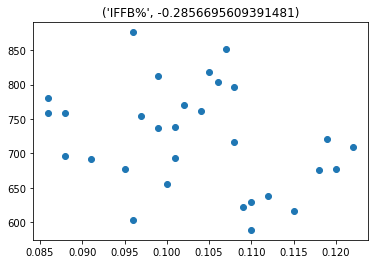

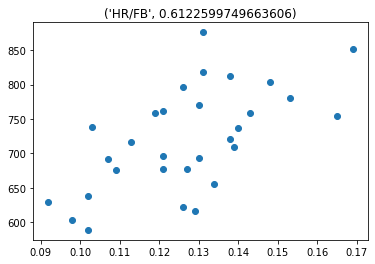

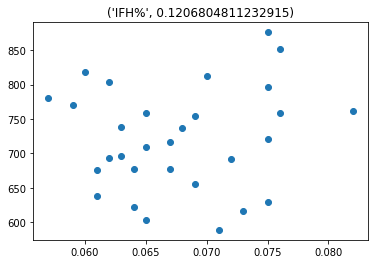

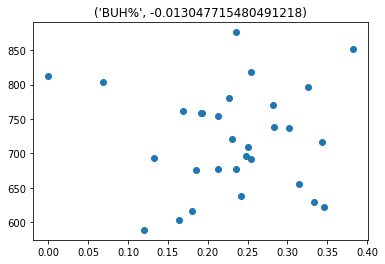

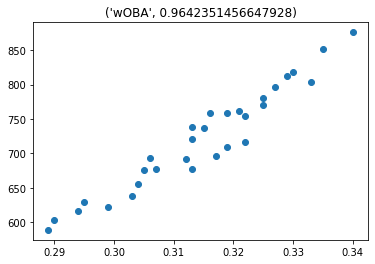

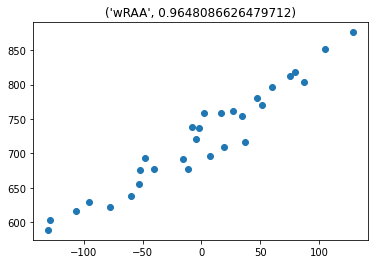

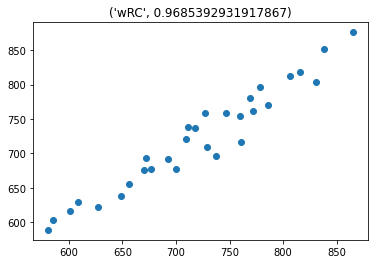

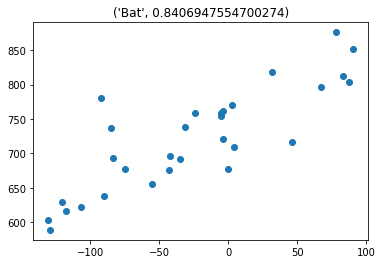

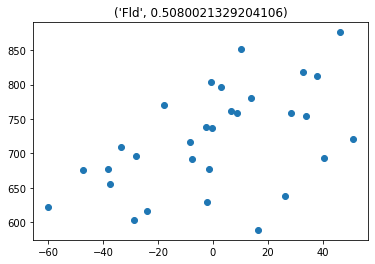

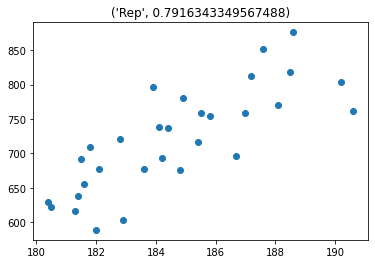

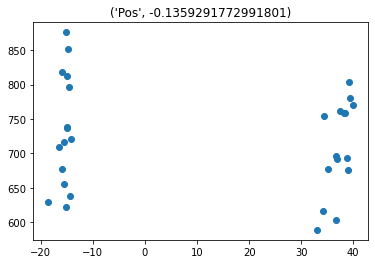

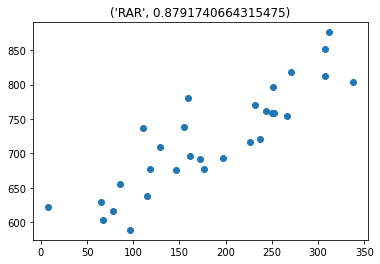

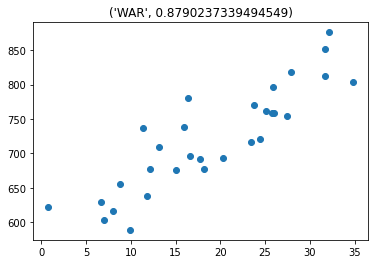

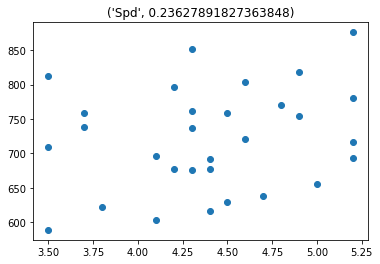

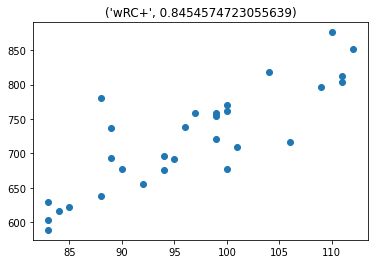

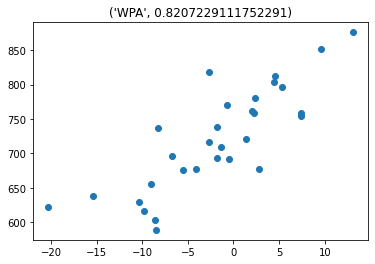

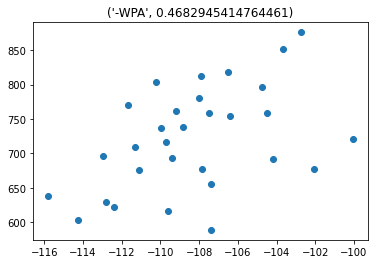

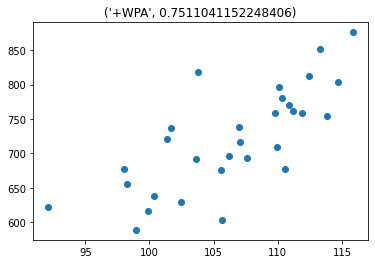

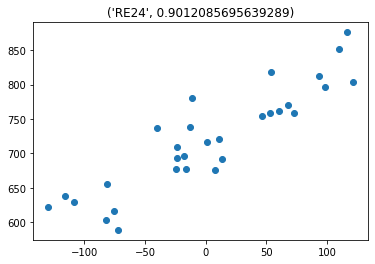

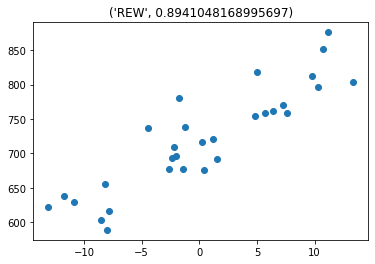

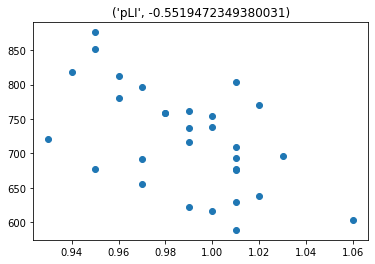

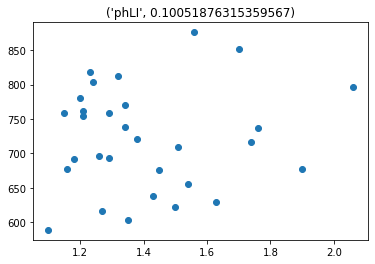

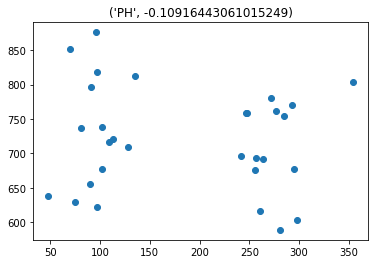

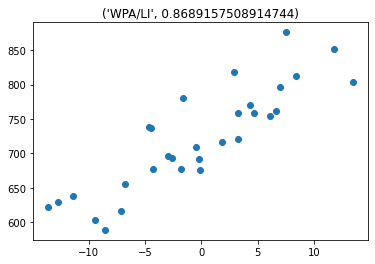

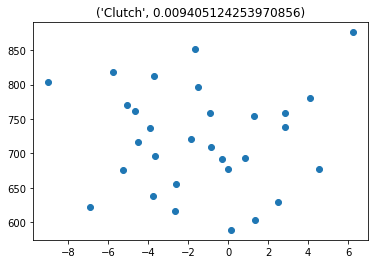

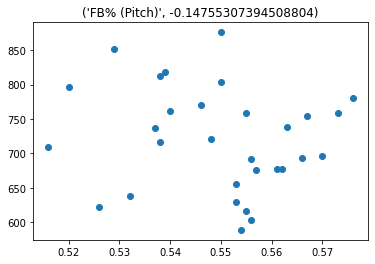

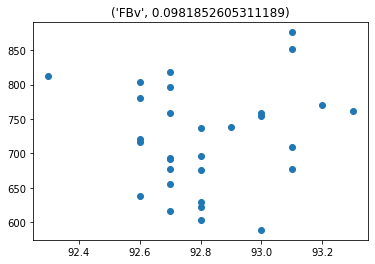

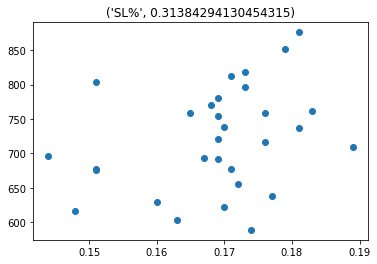

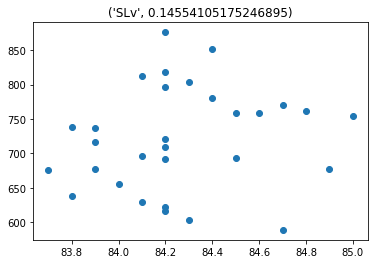

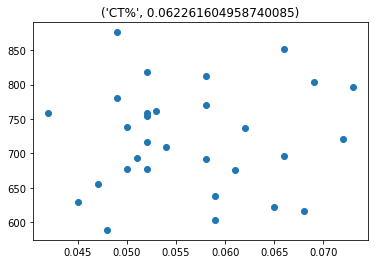

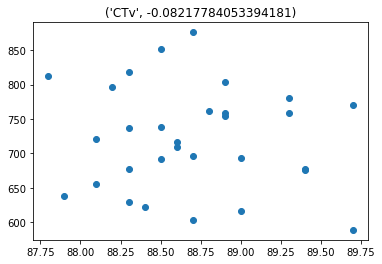

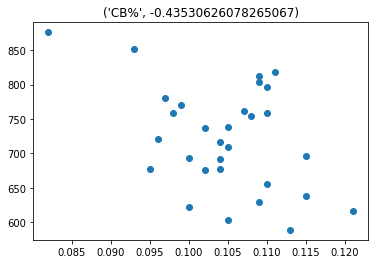

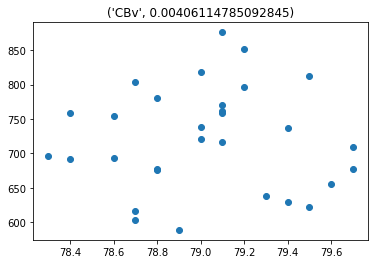

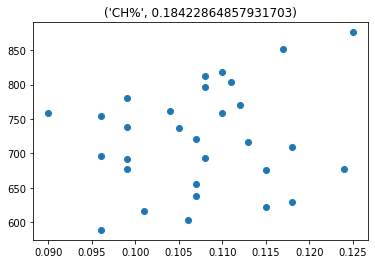

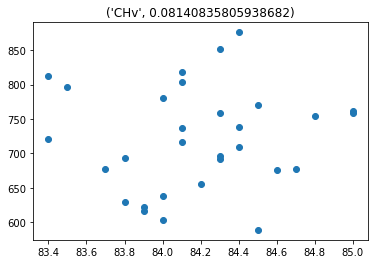

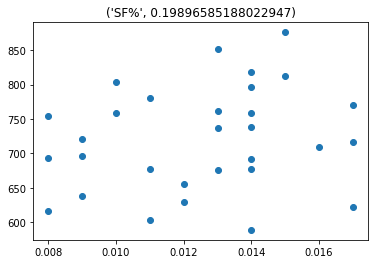

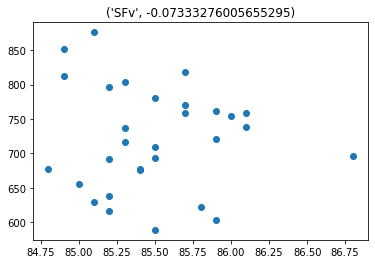

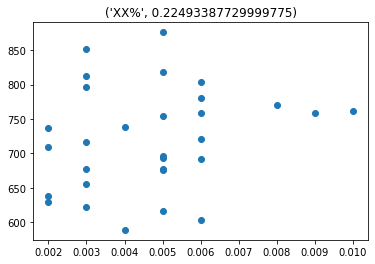

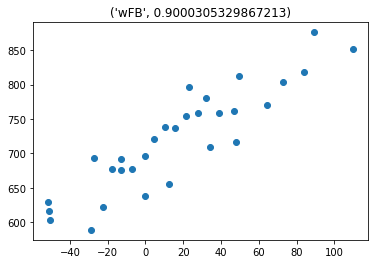

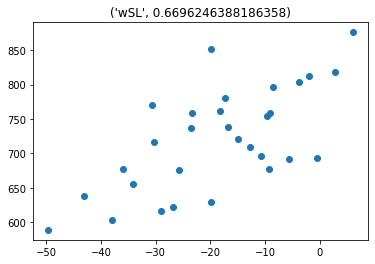

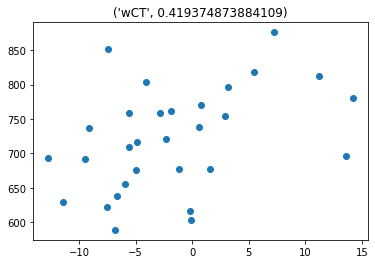

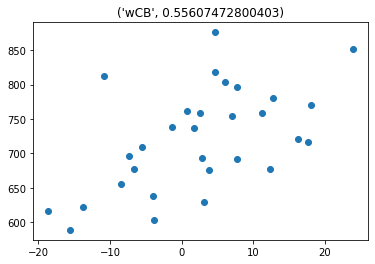

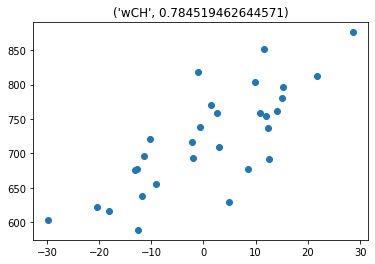

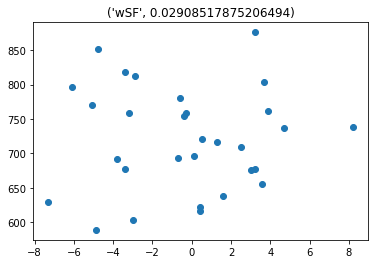

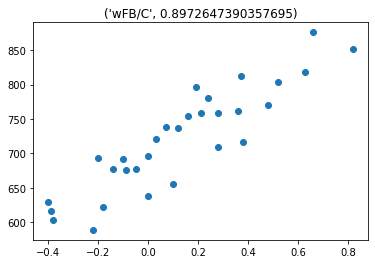

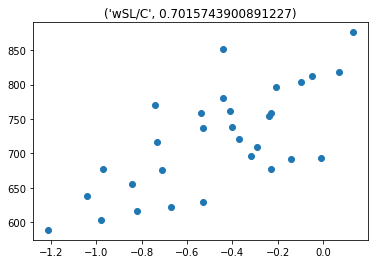

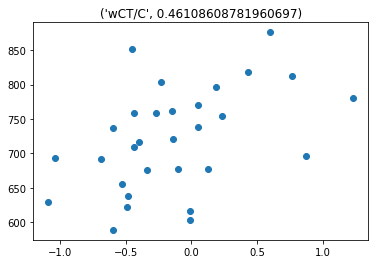

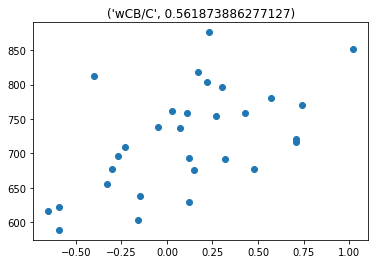

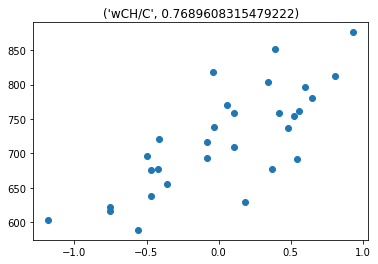

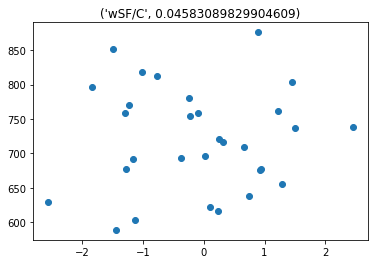

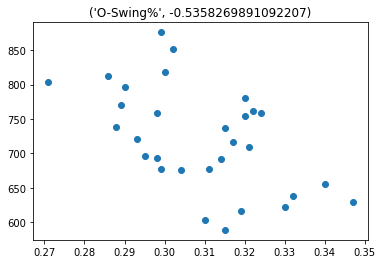

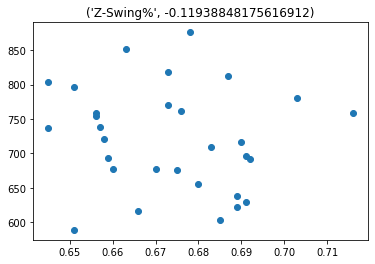

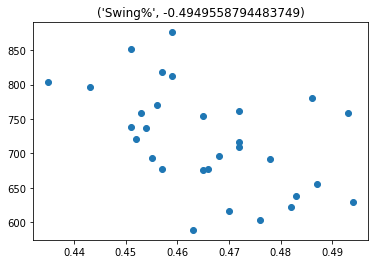

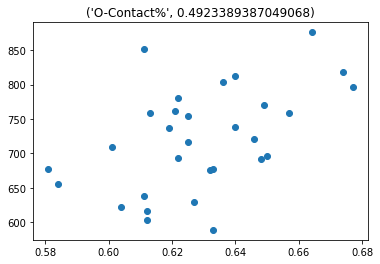

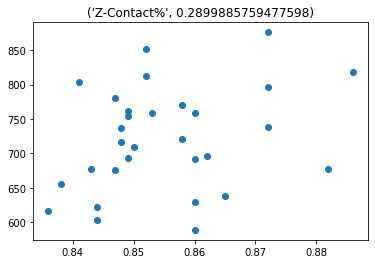

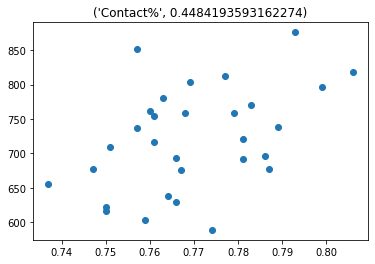

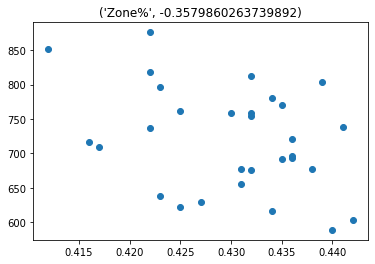

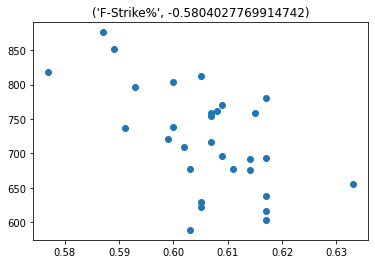

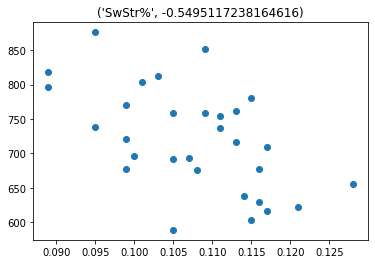

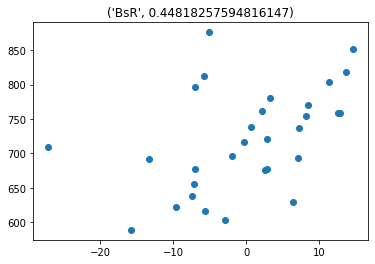

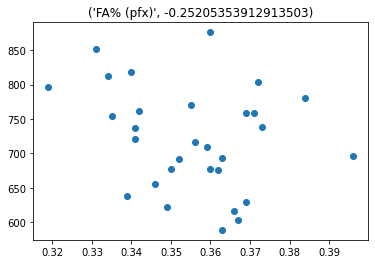

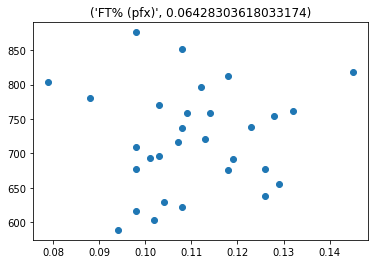

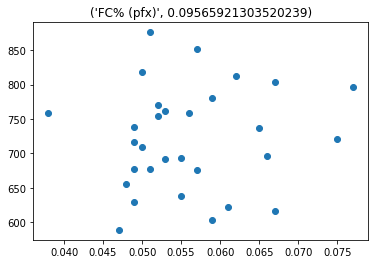

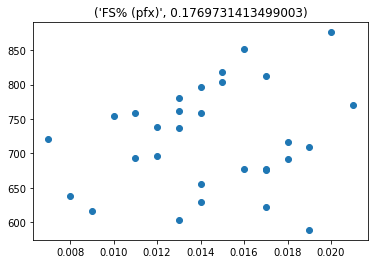

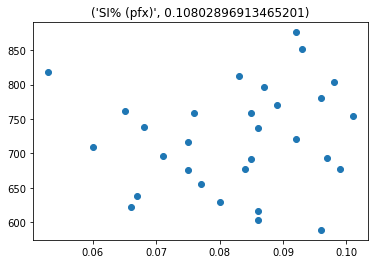

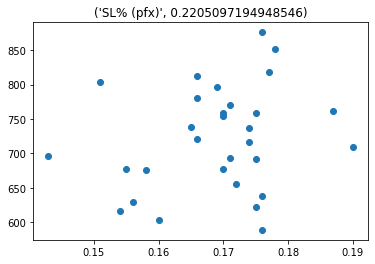

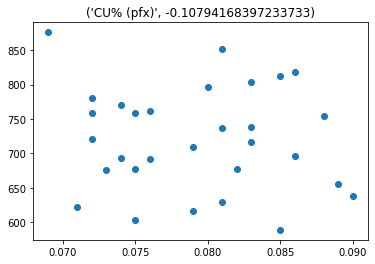

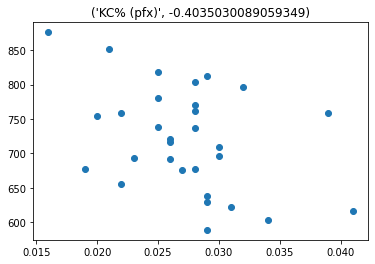

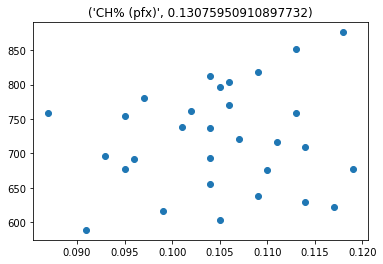

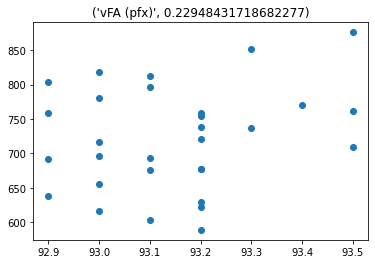

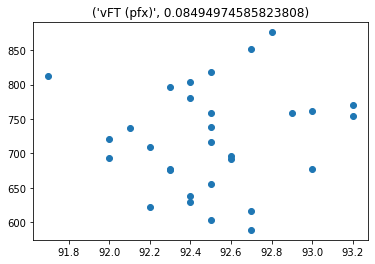

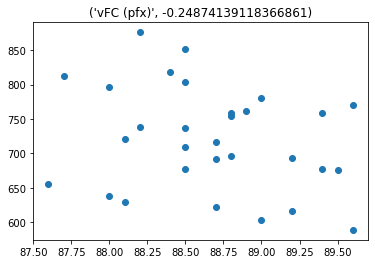

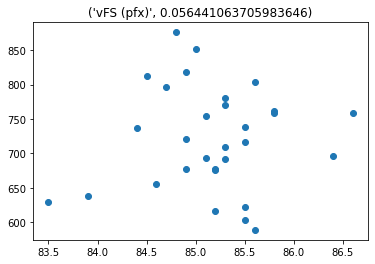

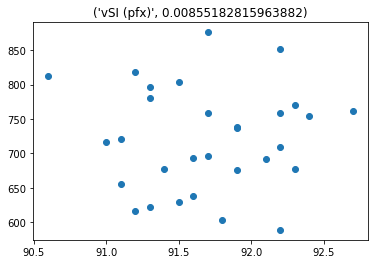

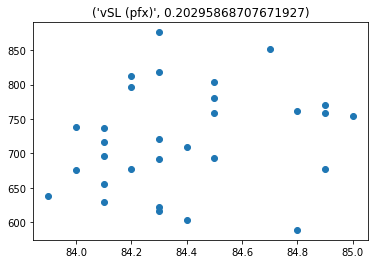

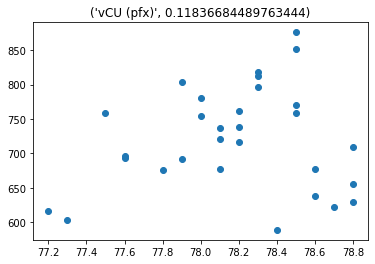

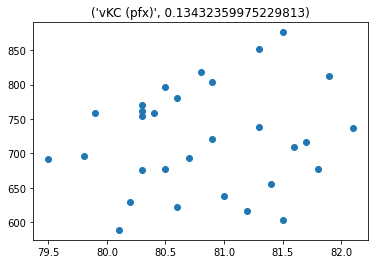

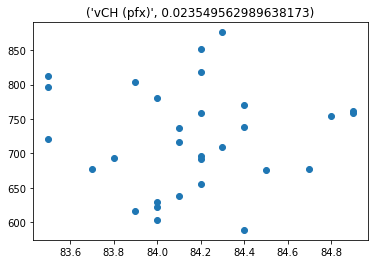

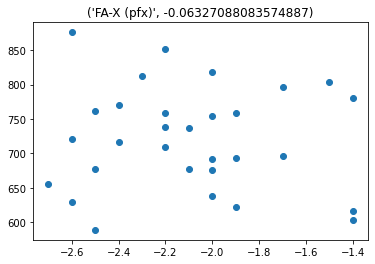

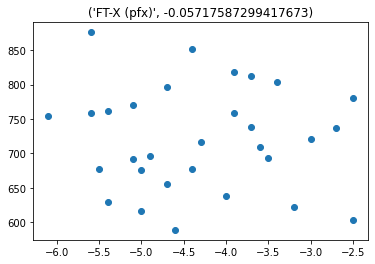

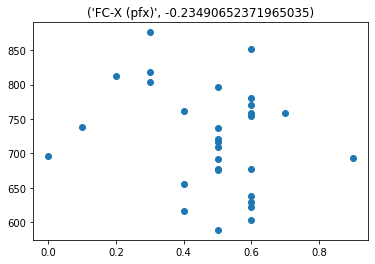

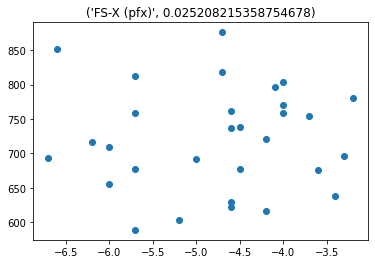

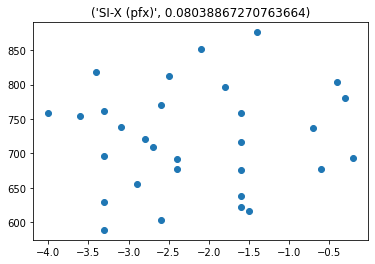

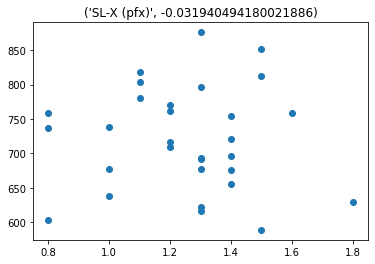

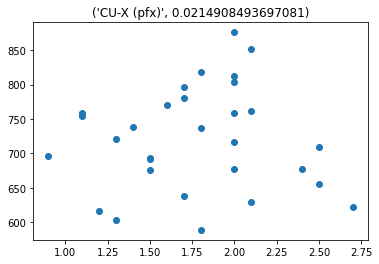

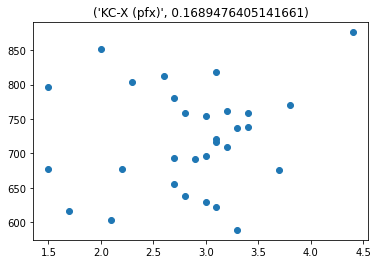

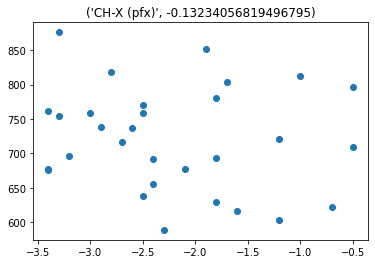

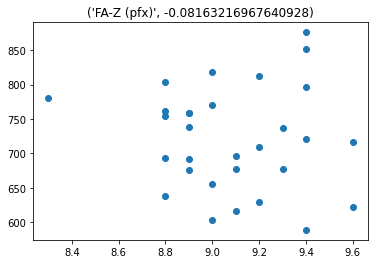

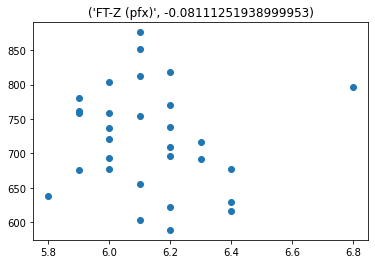

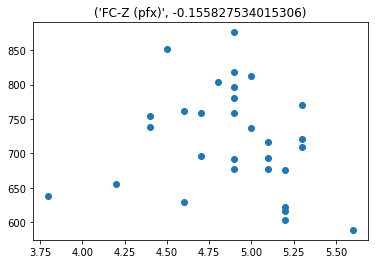

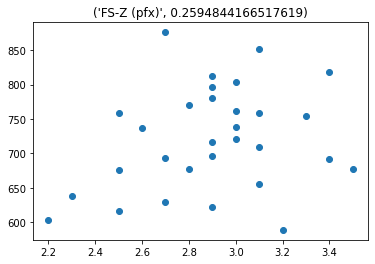

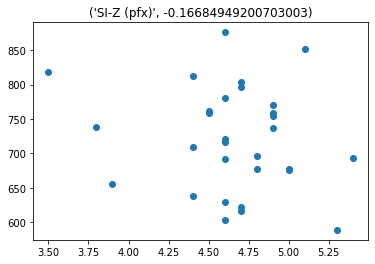

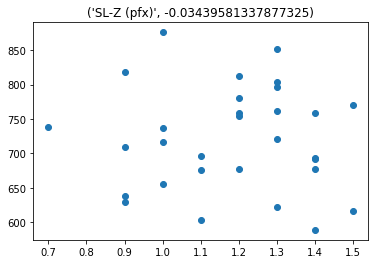

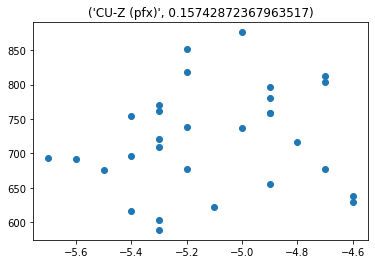

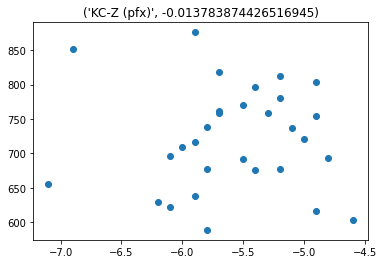

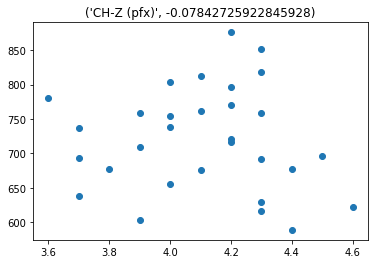

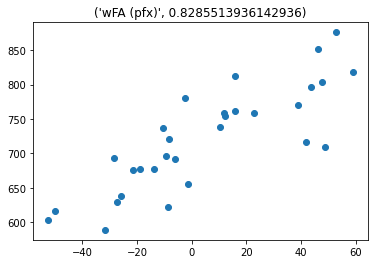

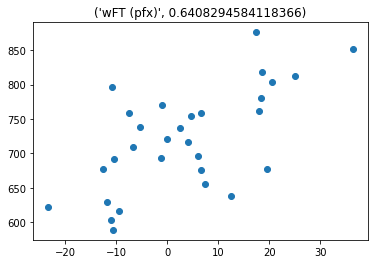

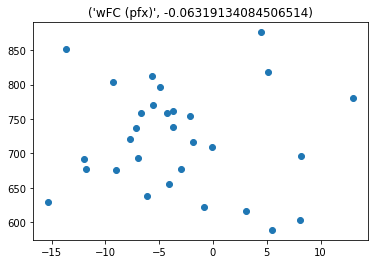

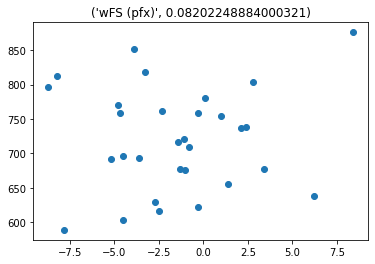

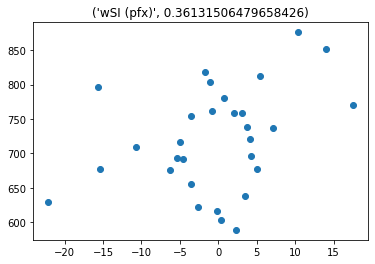

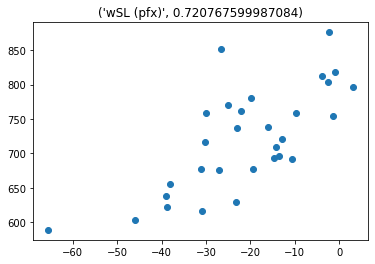

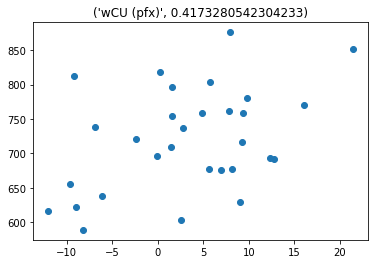

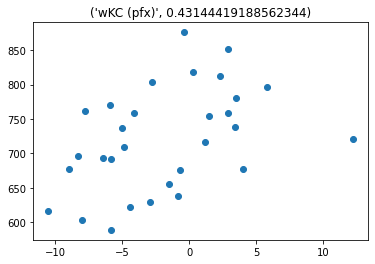

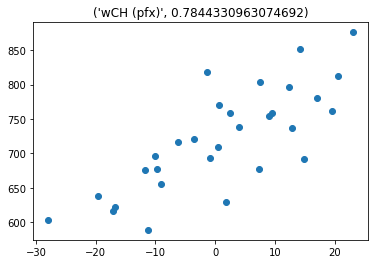

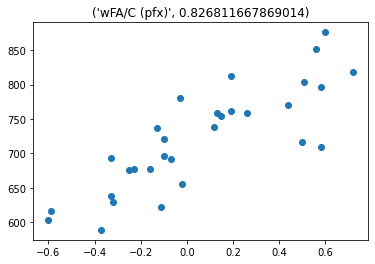

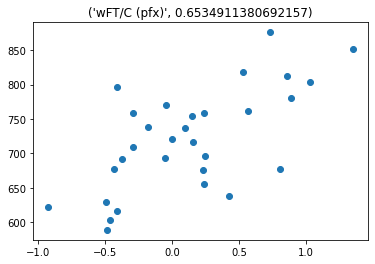

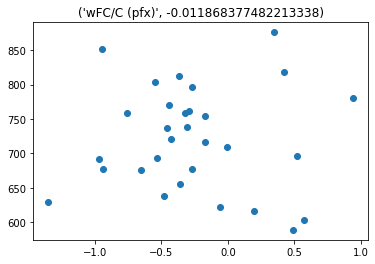

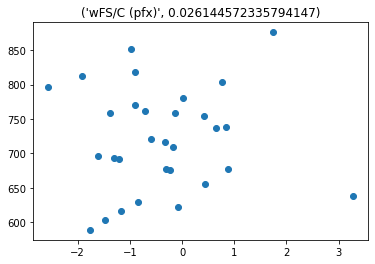

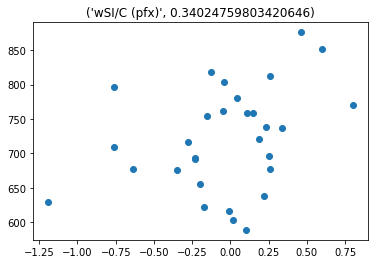

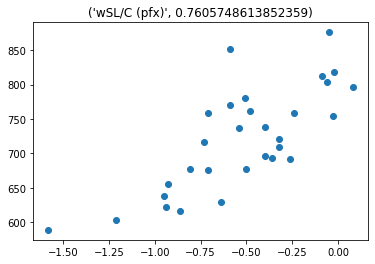

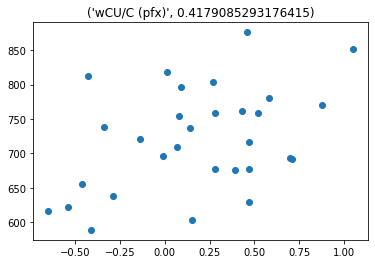

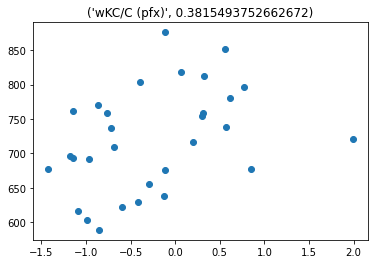

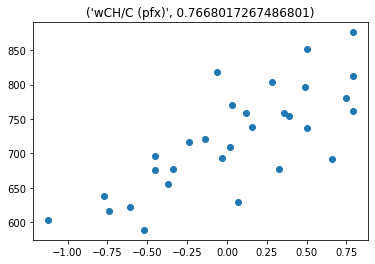

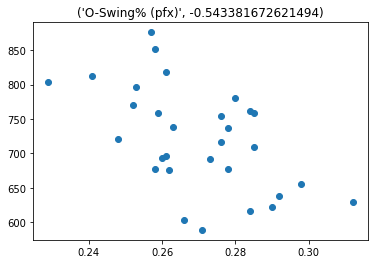

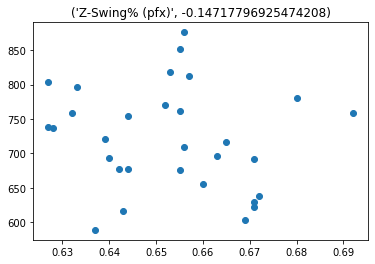

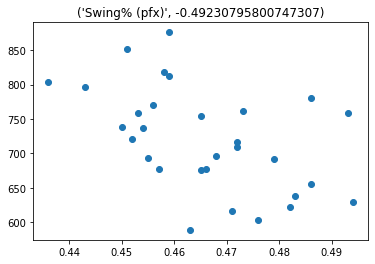

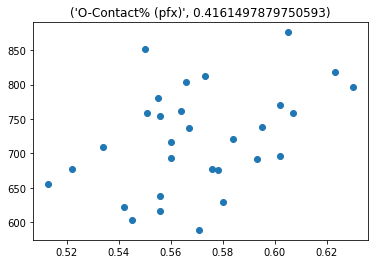

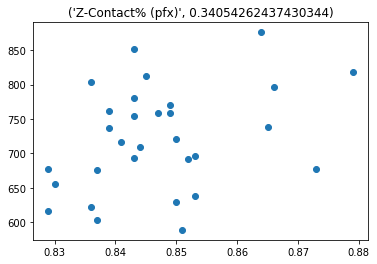

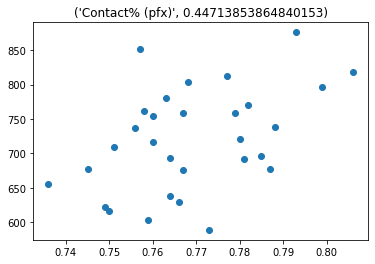

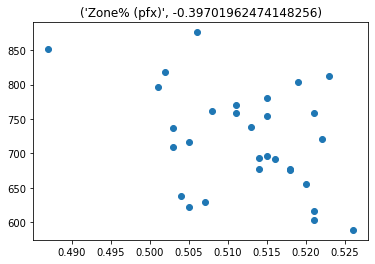

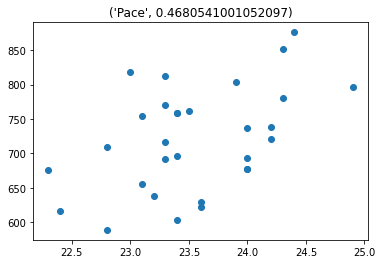

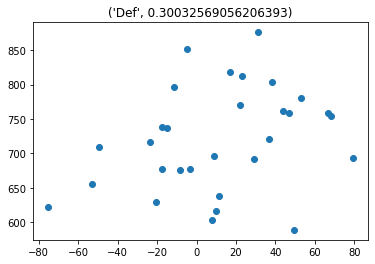

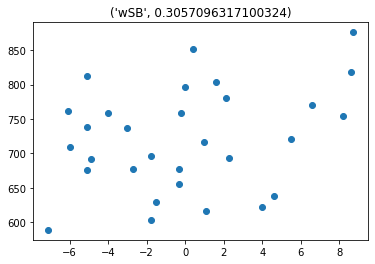

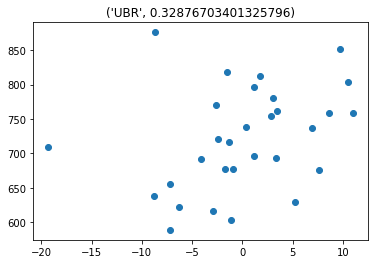

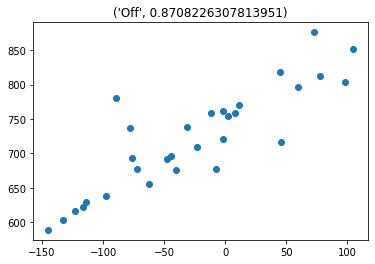

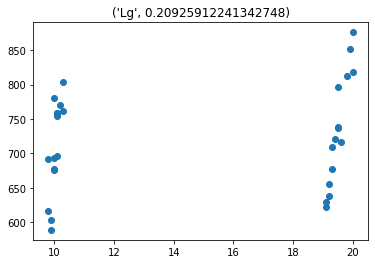

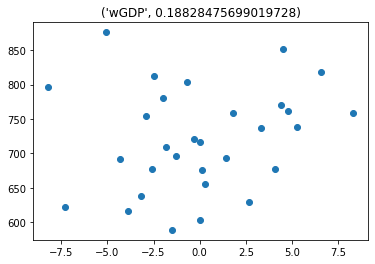

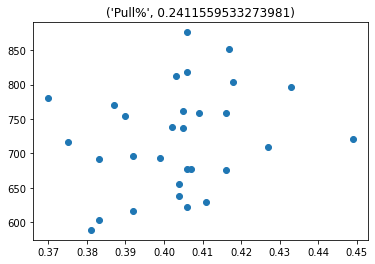

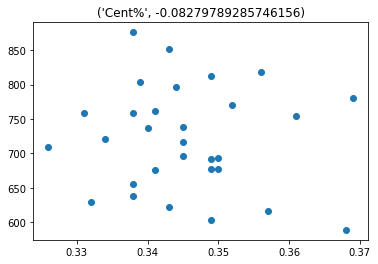

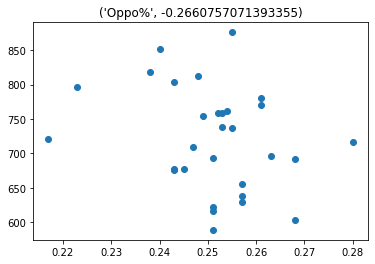

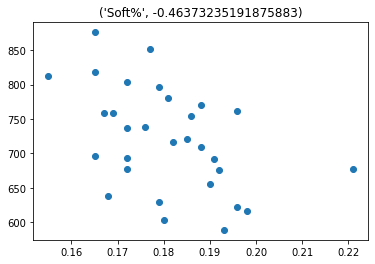

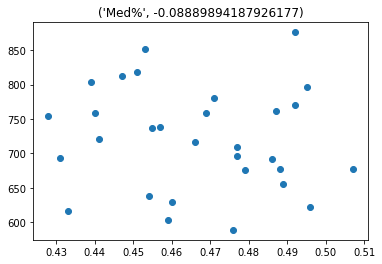

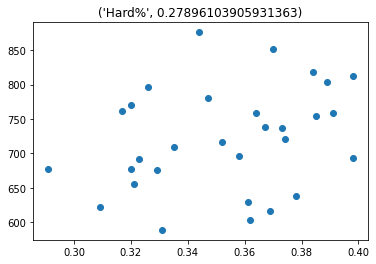

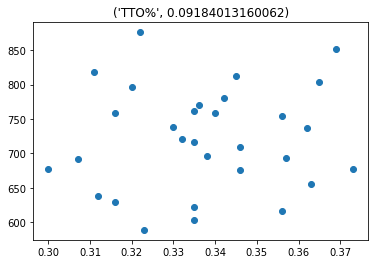

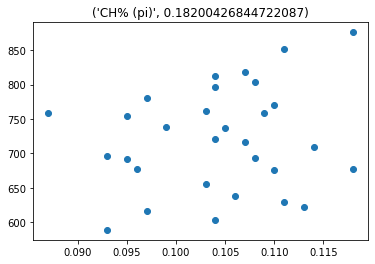

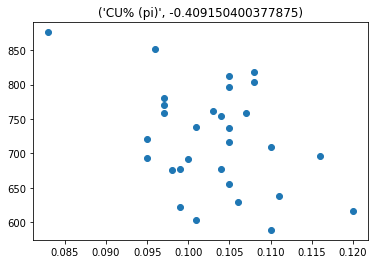

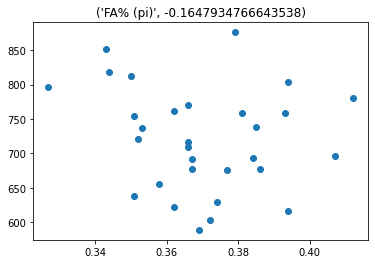

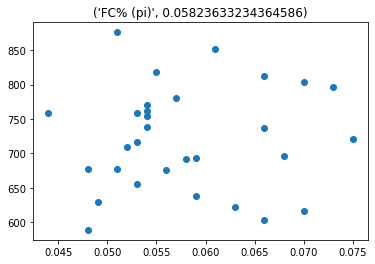

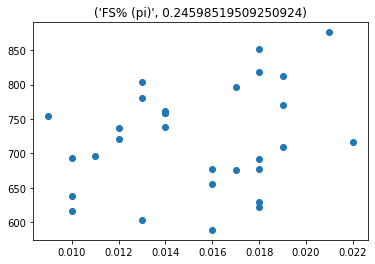

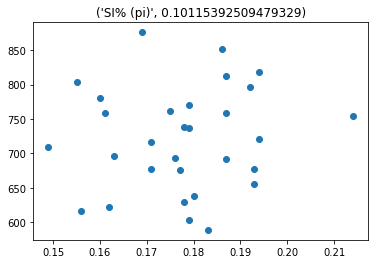

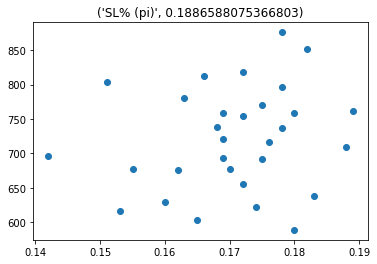

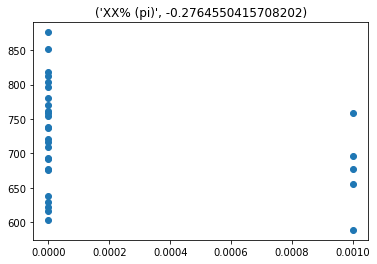

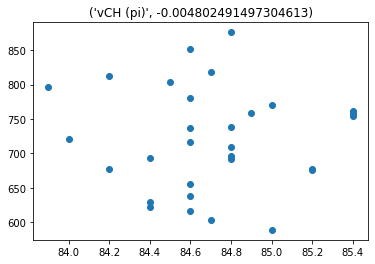

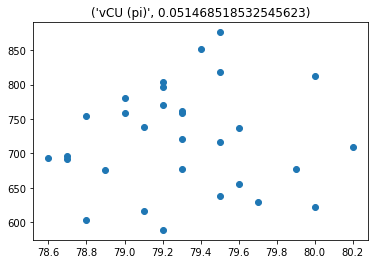

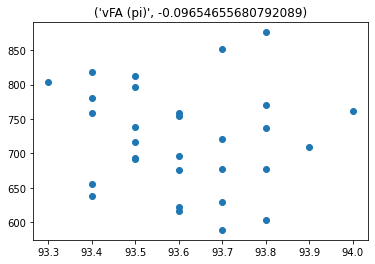

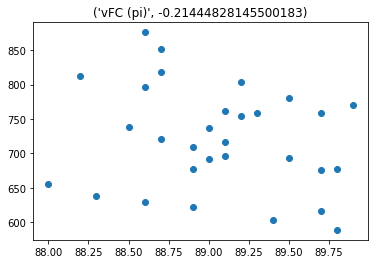

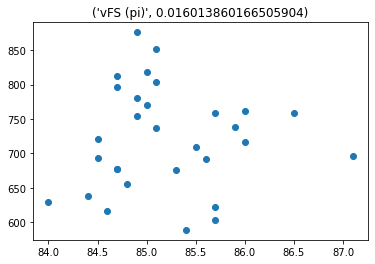

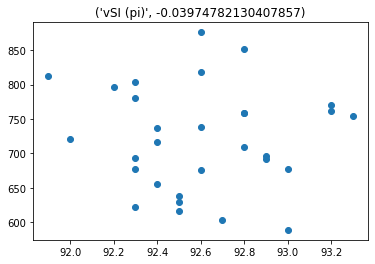

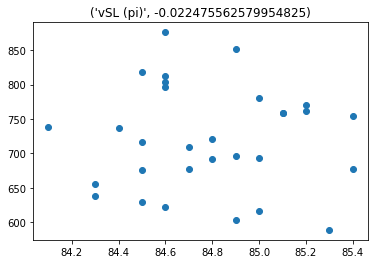

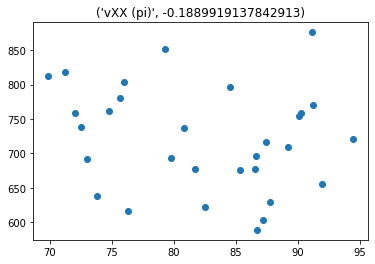

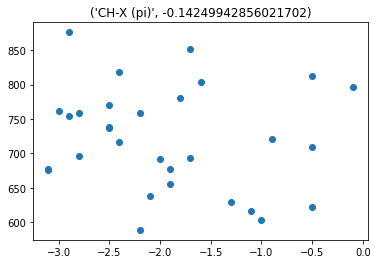

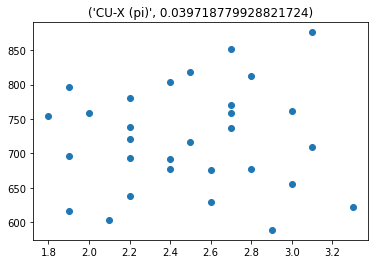

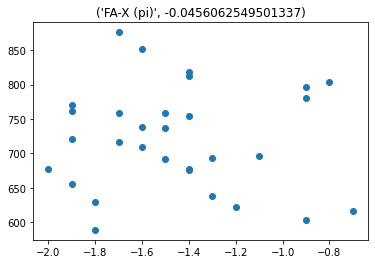

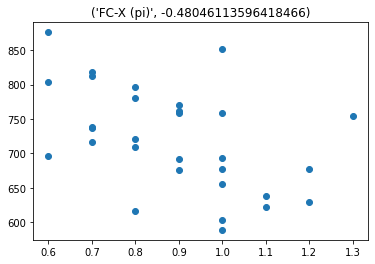

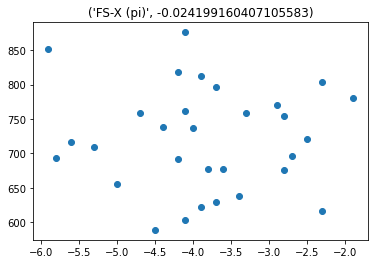

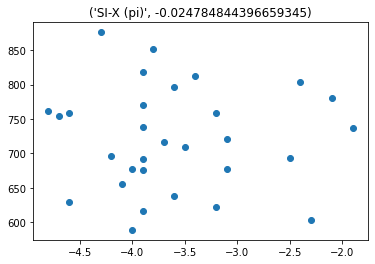

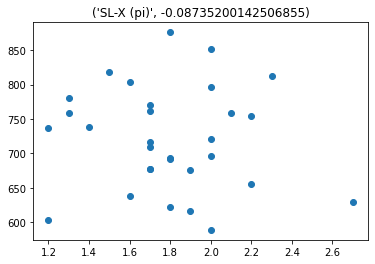

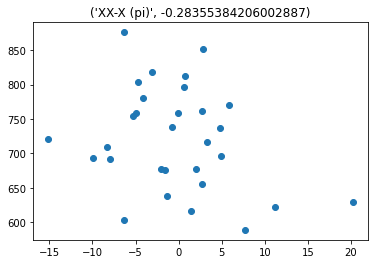

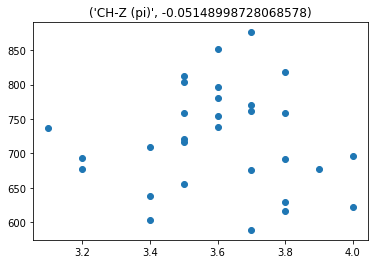

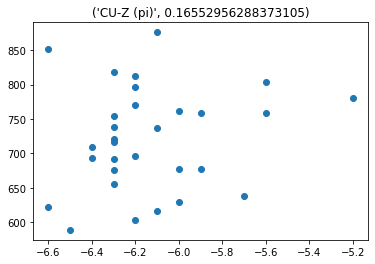

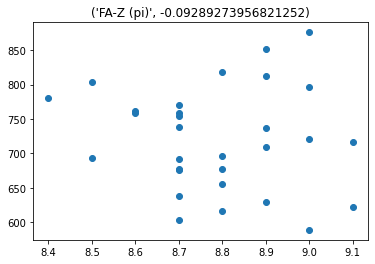

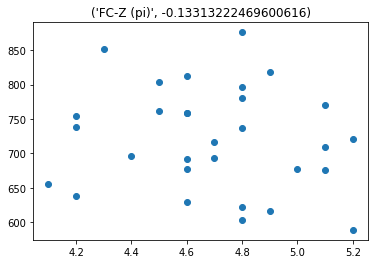

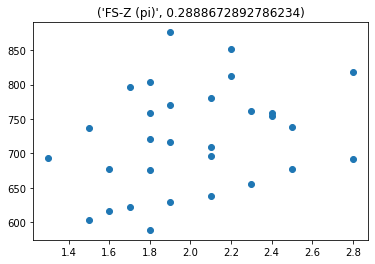

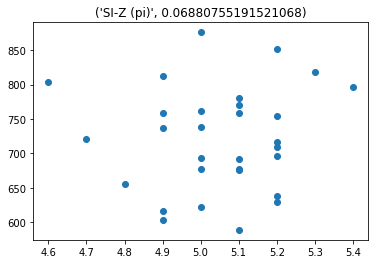

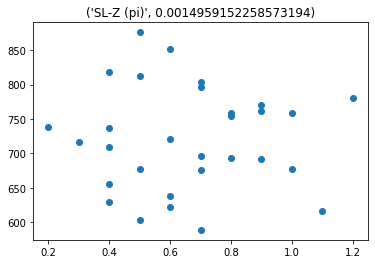

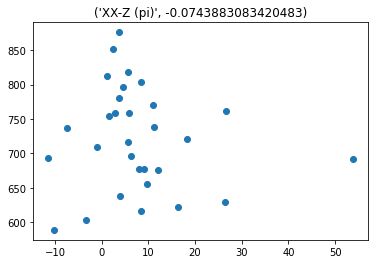

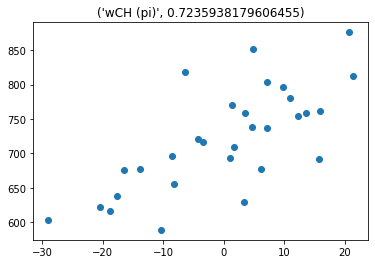

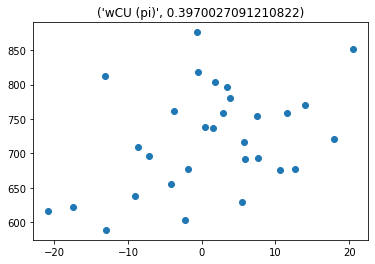

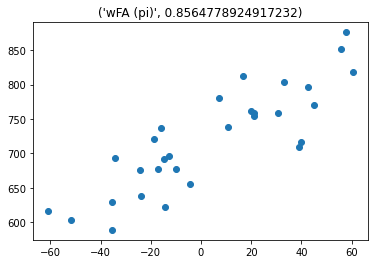

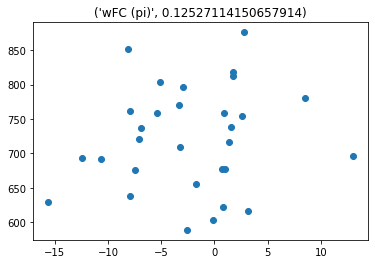

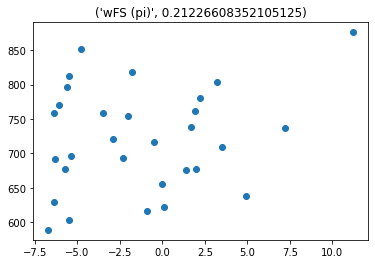

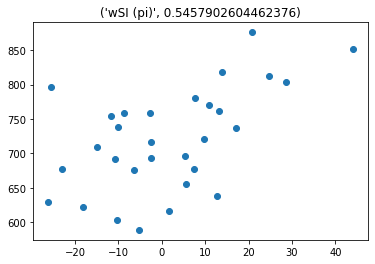

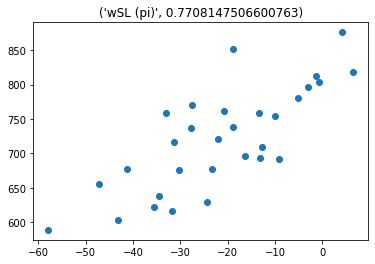

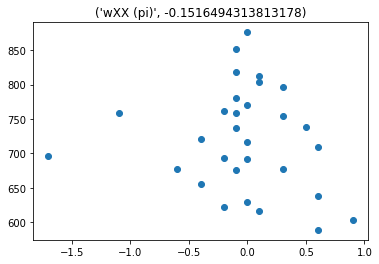

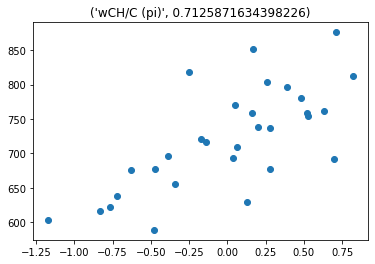

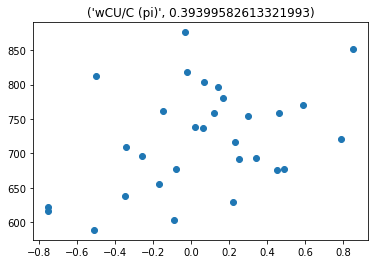

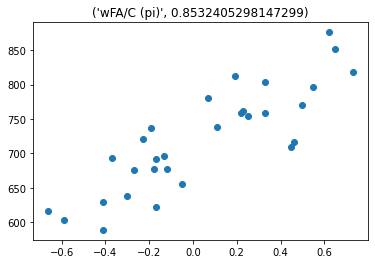

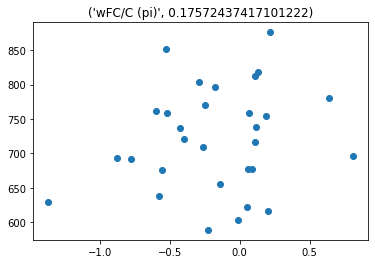

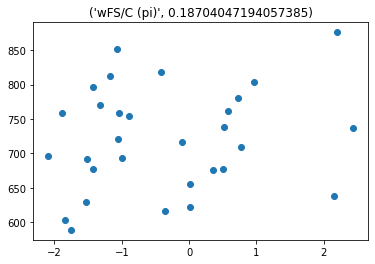

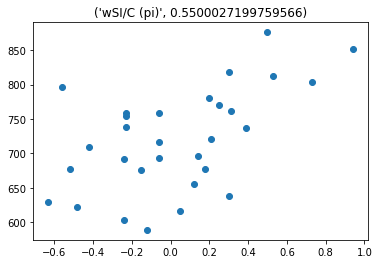

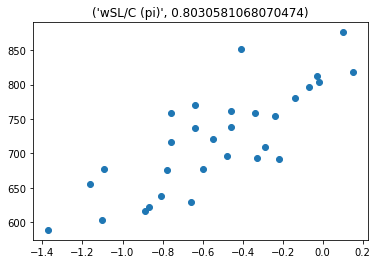

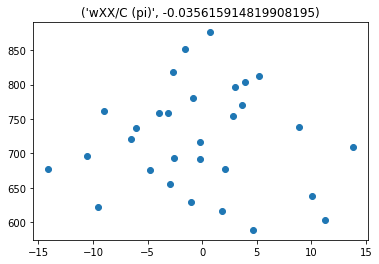

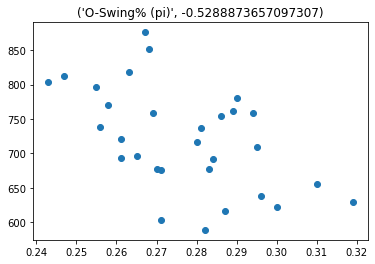

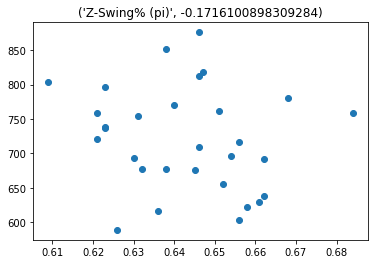

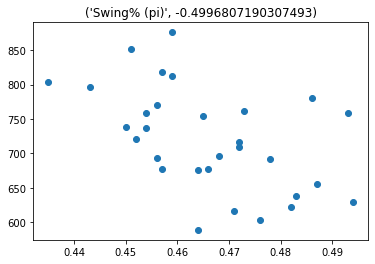

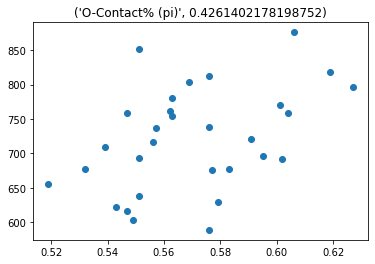

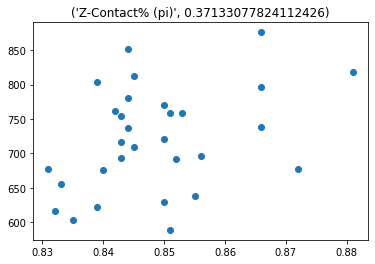

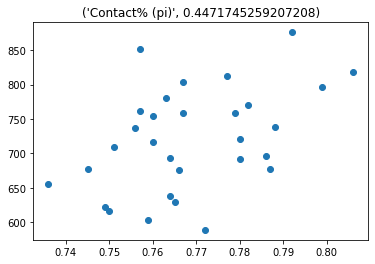

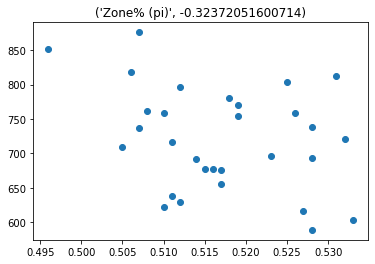

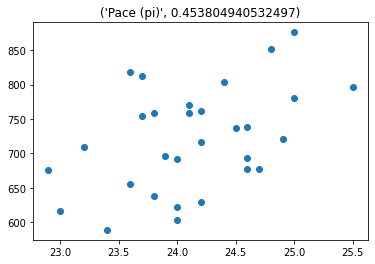

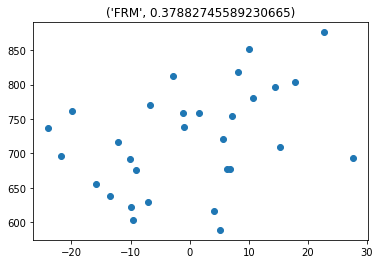

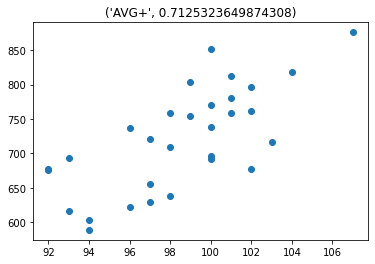

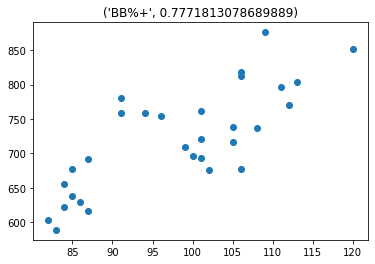

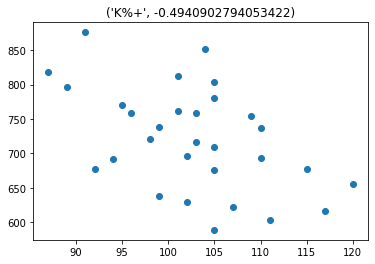

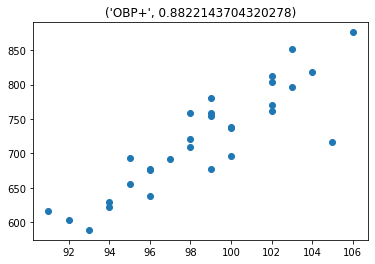

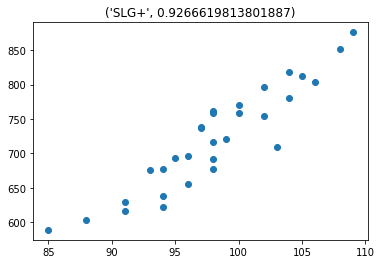

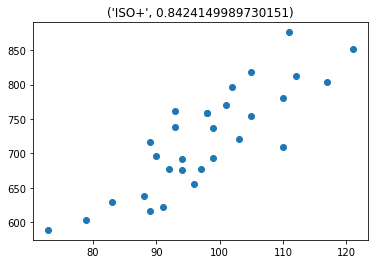

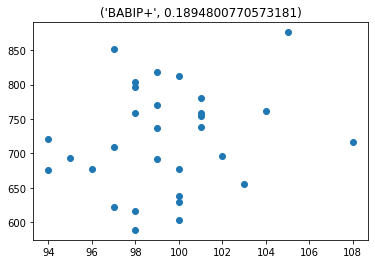

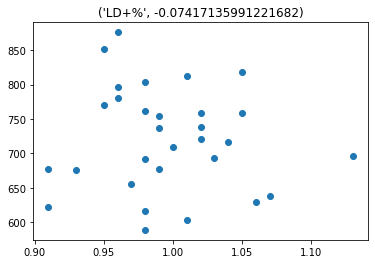

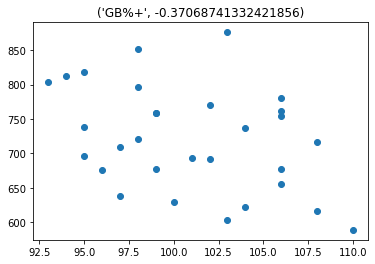

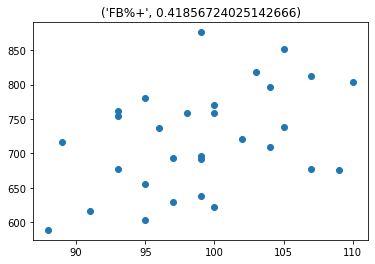

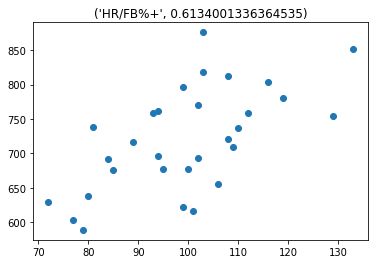

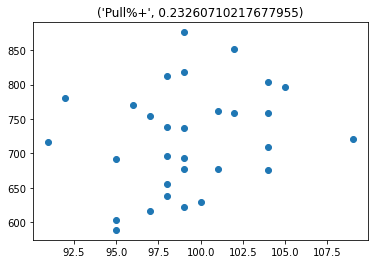

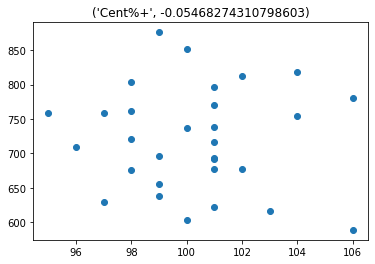

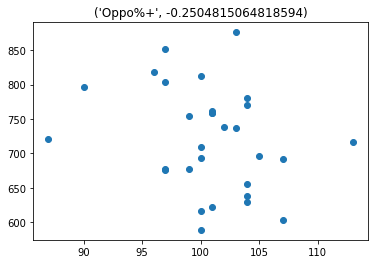

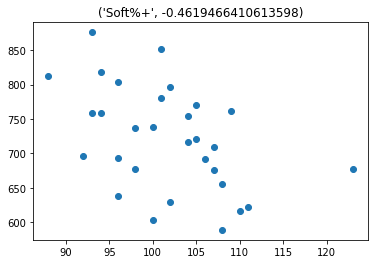

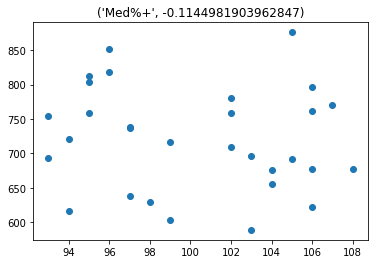

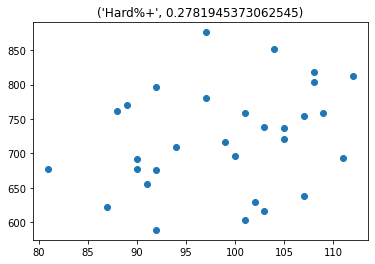

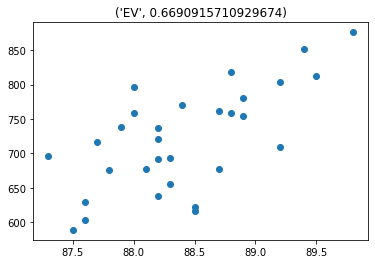

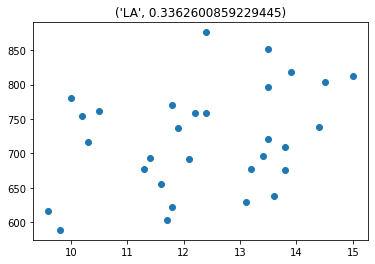

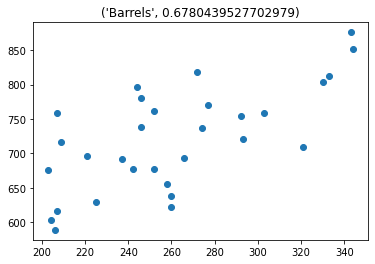

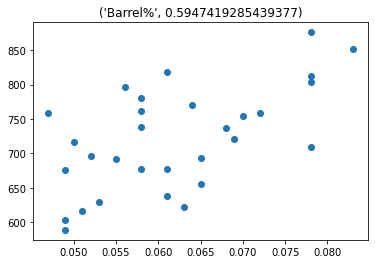

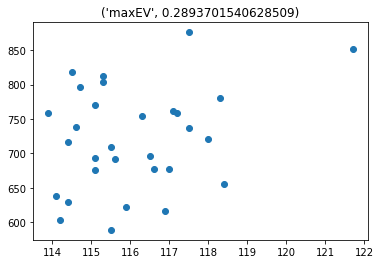

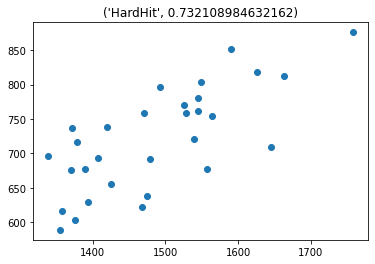

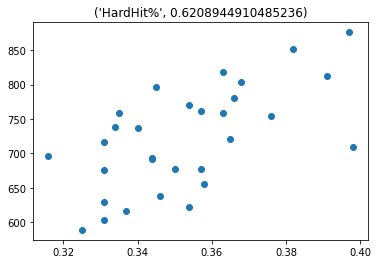

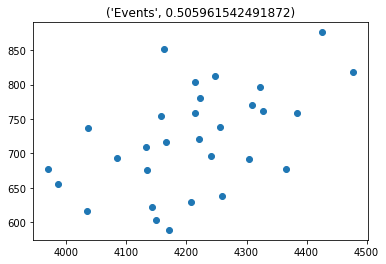

In [8]:

for col in hitting:
    try:
        #calculate correlation coefficient of variable
        title = (col,stats.pearsonr(hitting[col], hitting['R'])[0])

        #scatter plot
        plt.figure()
        plt.scatter(x=hitting[col]
                    , y=hitting['R'])
        plt.title(title)
        plt.show()
    except:
        continue